# Demo IPDxIRR_2F (ionospheric plasma densities)

> Authors: Ashley Smith
>
> Abstract: Access to the derived plasma characteristics at 1Hz (level 2 product).

In [1]:
# %load_ext watermark
# %watermark -i -v -p viresclient,pandas,xarray,matplotlib

In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

request = SwarmRequest()

## IPDxIRR_2F product information

Derived plasma characteristics at 1Hz, for each Swarm spacecraft.

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#IPDxIRR_2F

### Check what "IPD" data variables are available

In [3]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [4]:
request.available_measurements("IPD")

['Ne',
 'Te',
 'Background_Ne',
 'Foreground_Ne',
 'PCP_flag',
 'Grad_Ne_at_100km',
 'Grad_Ne_at_50km',
 'Grad_Ne_at_20km',
 'Grad_Ne_at_PCP_edge',
 'ROD',
 'RODI10s',
 'RODI20s',
 'delta_Ne10s',
 'delta_Ne20s',
 'delta_Ne40s',
 'Num_GPS_satellites',
 'mVTEC',
 'mROT',
 'mROTI10s',
 'mROTI20s',
 'IBI_flag',
 'Ionosphere_region_flag',
 'IPIR_index',
 'Ne_quality_flag',
 'TEC_STD']

## Fetch three hours of IPD data

In [5]:
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data = request.get_between(
    dt.datetime(2014,12,21, 0),
    dt.datetime(2014,12,21, 3)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ] (2.273MB)


### Load and plot using pandas/matplotlib

In [6]:
df = data.as_dataframe()
df.head()

,delta_Ne10s,mVTEC,RODI10s,IPIR_index,Grad_Ne_at_PCP_edge,delta_Ne20s,Te,delta_Ne40s,Background_Ne,IBI_flag,...,mROTI10s,RODI20s,Radius,Num_GPS_satellites,Longitude,PCP_flag,ROD,Ne_quality_flag,mROT,TEC_STD
2014-12-21 00:00:00.197000027,67.875,46.875010,10238.517220,7,0.0,10266.500,2212.28,3811.1,1343147.625,-1,...,0.000901,7764.002532,6.840404e+06,4,-128.772604,0,0.0,1000,-0.007534,2.282493
2014-12-21 00:00:01.197000027,12961.600,46.858859,3263.138721,6,0.0,2830.850,2165.19,16343.3,1343147.625,-1,...,0.001761,7181.496228,6.840413e+06,4,-128.773822,0,0.0,1000,-0.007534,2.277975
2014-12-21 00:00:02.197000027,0.000,46.846395,3263.138721,6,0.0,0.000,1544.87,3246.4,1343147.625,-1,...,0.002128,7181.496228,6.840422e+06,4,-128.775026,0,0.0,1000,-0.005997,2.271013
2014-12-21 00:00:03.197000027,12393.550,46.833033,3263.138721,6,0.0,2194.925,1228.50,848.3,1343147.625,-1,...,0.002506,7390.308480,6.840431e+06,4,-128.776229,0,0.0,1000,-0.005841,2.266208
2014-12-21 00:00:04.197000027,21700.700,46.820935,3263.138721,6,0.0,9491.525,2681.51,6448.3,1343147.625,-1,...,0.002660,7554.331699,6.840440e+06,4,-128.777432,0,0.0,1000,-0.005841,2.259809


In [7]:
df.columns

Index(['delta_Ne10s', 'mVTEC', 'RODI10s', 'IPIR_index', 'Grad_Ne_at_PCP_edge',
       'delta_Ne20s', 'Te', 'delta_Ne40s', 'Background_Ne', 'IBI_flag',
       'Spacecraft', 'Foreground_Ne', 'mROTI20s', 'Grad_Ne_at_50km',
       'Ionosphere_region_flag', 'Ne', 'Latitude', 'Grad_Ne_at_20km',
       'Grad_Ne_at_100km', 'mROTI10s', 'RODI20s', 'Radius',
       'Num_GPS_satellites', 'Longitude', 'PCP_flag', 'ROD', 'Ne_quality_flag',
       'mROT', 'TEC_STD'],
      dtype='object')

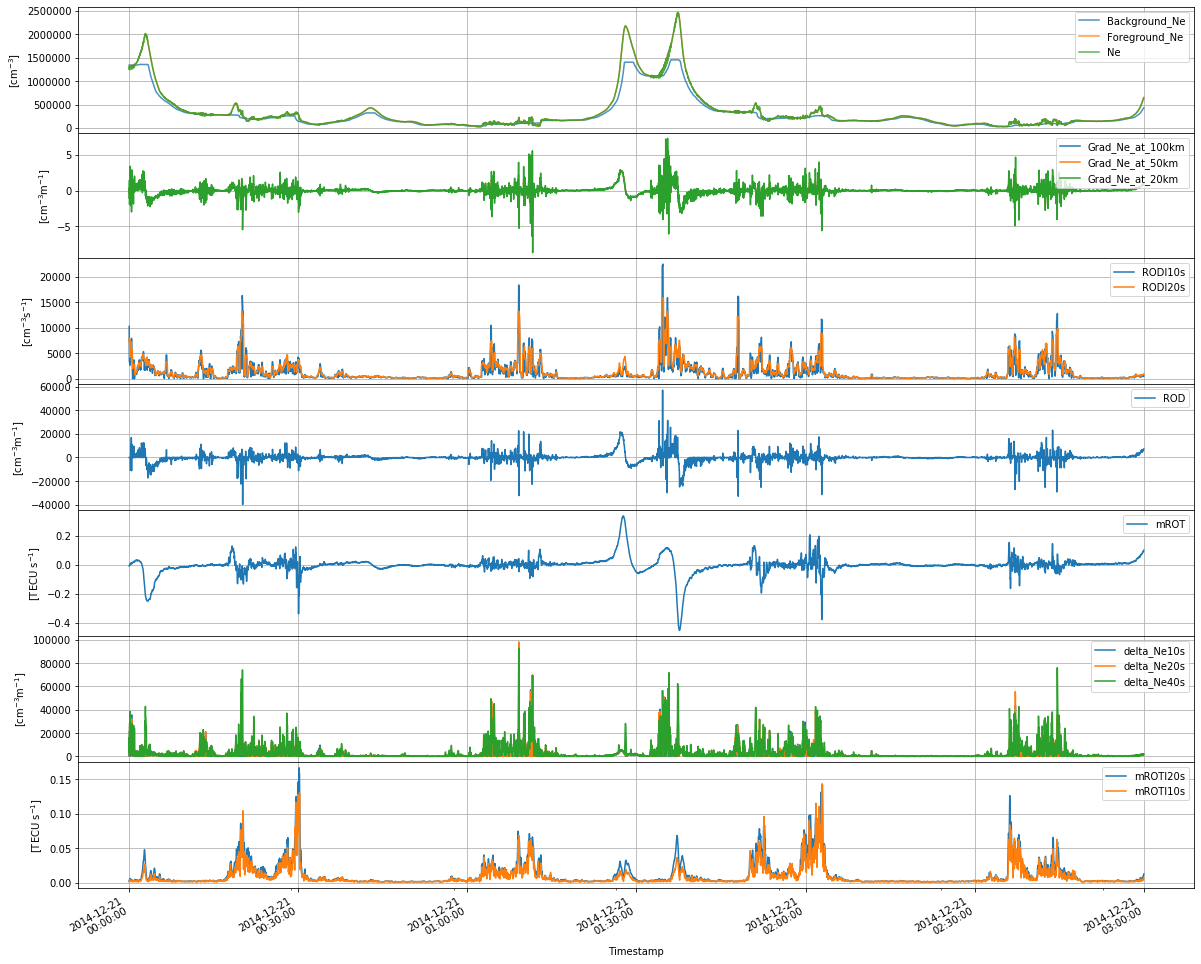

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

### Load as xarray

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:                 (Timestamp: 10800)
Coordinates:
  * Timestamp               (Timestamp) datetime64[ns] 2014-12-21T00:00:00.197000027 ... 2014-12-21T02:59:59.197000027
Data variables:
    Spacecraft              (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A'
    delta_Ne10s             (Timestamp) float64 67.88 1.296e+04 ... 1.702e+03
    RODI10s                 (Timestamp) float64 1.024e+04 3.263e+03 ... 503.7
    IPIR_index              (Timestamp) int32 7 6 6 6 6 6 6 6 ... 4 4 4 4 4 4 4
    Background_Ne           (Timestamp) float64 1.343e+06 1.343e+06 ... 4.29e+05
    Foreground_Ne           (Timestamp) float64 1.305e+06 ... 6.488e+05
    Grad_Ne_at_50km         (Timestamp) float64 -0.4039 0.1449 ... 0.9347 0.9775
    Ionosphere_region_flag  (Timestamp) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    Grad_Ne_at_100km        (Timestamp) float64 -0.08492 -0.144 ... 0.9621
    RODI20s                 (Timestamp) float64 7.764e+03 7.181e+03 ... 907.9
    Radius                  (Timestamp) float64 6.84e+06 6.84e+06 ... 6.835e+06
    Num_GPS_satellites      (Timestamp) int32 4 4 4 4 4 4 4 4 ... 6 6 6 6 6 6 6
    mROT                    (Timestamp) float64 -0.007534 -0.007534 ... 0.09938
    mVTEC                   (Timestamp) float64 46.88 46.86 ... 14.44 14.54
    Grad_Ne_at_PCP_edge     (Timestamp) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    delta_Ne20s             (Timestamp) float64 1.027e+04 ... 1.702e+03
    Te                      (Timestamp) float64 2.212e+03 ... 1.723e+03
    delta_Ne40s             (Timestamp) float64 3.811e+03 ... 1.702e+03
    IBI_flag                (Timestamp) int32 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1
    mROTI20s                (Timestamp) float64 0.002623 0.002574 ... 0.01216
    Ne                      (Timestamp) float64 1.255e+06 1.25e+06 ... 6.468e+05
    Grad_Ne_at_20km         (Timestamp) float64 -1.048 0.3384 ... 1.002 0.9148
    mROTI10s                (Timestamp) float64 0.0009012 0.001761 ... 0.005962
    Longitude               (Timestamp) float64 -128.8 -128.8 ... -175.4 -175.4
    PCP_flag                (Timestamp) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    ROD                     (Timestamp) float64 0.0 0.0 ... 7.28e+03 7.28e+03
    Ne_quality_flag         (Timestamp) int32 1000 1000 1000 ... 1000 1000 1000
    Latitude                (Timestamp) float64 -4.757 -4.821 ... 24.68 24.61
    TEC_STD                 (Timestamp) float64 2.282 2.278 2.271 ... 2.33 2.35
Attributes:
    Sources:         ['SW_OPER_IPDAIRR_2F_20141221T000000_20141221T235959_0201']
    MagneticModels:  []
    RangeFilters:    []

### Alternative plot setup

To plot the data from xarray, we need a different plotting setup. This does however give us more control over the plot. The units are extracted directly from the xarray object.

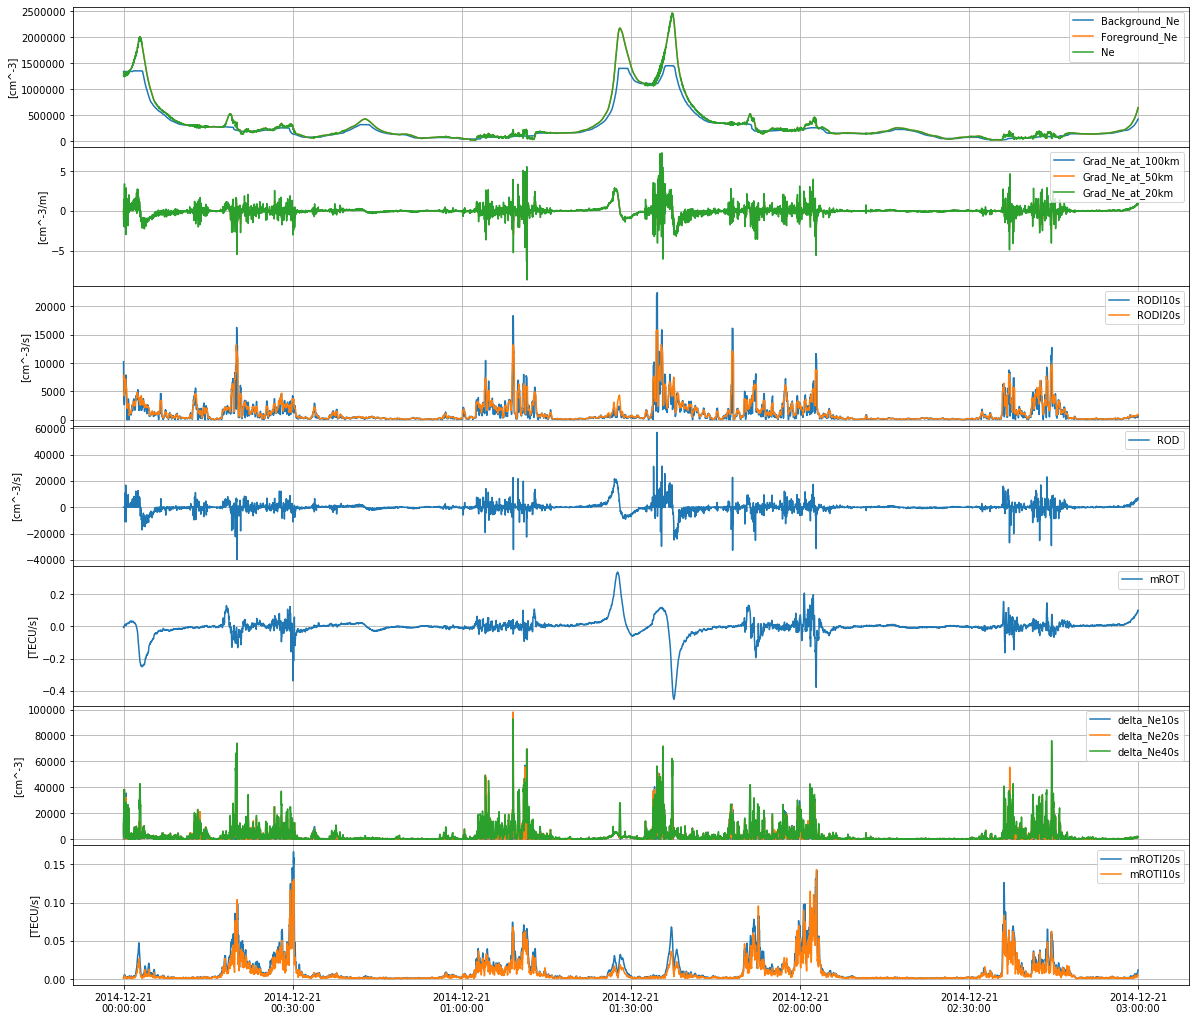

In [10]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
def subplot(ax=None, y=None, **kwargs):
    """Plot combination of variables onto a given axis"""
    units = ds[y[0]].units
    for var in y:
        ax.plot(ds["Timestamp"], ds[var], label=var, **kwargs)
        if units != ds[var].units:
            raise ValueError(f"Units mismatch for {var}")
    ax.set_ylabel(f"[{units}]")
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
subplot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'])
subplot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
subplot(ax=axes[2], y=['RODI10s', 'RODI20s'])
subplot(ax=axes[3], y=['ROD'])
subplot(ax=axes[4], y=['mROT'])
subplot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
subplot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
fig.subplots_adjust(hspace=0)